# Import Library dan Data yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

# Missing Values Checking

In [5]:
## Melihat nilai NULL pada dataframe
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
## Melihat data yang duplikat
df.duplicated().sum()

0

Berdasarkan hasil dari output tersebut, tidak terdapat data yang NULL / kosong dan juga tidak terdapat data yang duplikat

# Categorical Data Encoding
Categorical Data Encoding dilakukan dengan 3 jenis pada kasus ini
1. One Hot Encoding, jika variabel memiliki nilai yang bersifat nominal atau tidak bertingkat.
2. Binary (Yes/No) Encoding, jika variabel memiliki dua nilai yang bertingkat.
3. Ordinal (Label) Encoding, jika variabel memiliki lebih dari dua nilai yang bertingkat.

In [12]:
# Mengambil data yang bertipe object
obj_df = df.select_dtypes(include='object').copy()
obj_df.dtypes

customerID          object
gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
TotalCharges        object
Churn               object
dtype: object

## Categorical Encoding pada Variabel "gender"

In [9]:
# Melihat jumlah data pada tiap kategori
obj_df["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

Berdasarkan jumlah kategori tersebut dan diketahui bahwa jenis kelamin merupakan variabel yang tidak bisa dibandingkan secara bertingkat, maka dilakukan One Hot Encoding

In [13]:
# One Hot Encoding untuk Variabel "gender"
obj_df = pd.get_dummies(obj_df, columns = ["gender"])
obj_df.head()

,customerID,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,gender_Female,gender_Male
0,7590-VHVEG,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No,1,0
1,5575-GNVDE,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No,0,1
2,3668-QPYBK,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes,0,1
3,7795-CFOCW,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No,0,1
4,9237-HQITU,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes,1,0


In [14]:
# Melihat tipe variabel lain
obj_df.dtypes

customerID          object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
TotalCharges        object
Churn               object
gender_Female        uint8
gender_Male          uint8
dtype: object

## Categorical Encoding pada Variabel "Partner"

In [15]:
# Melihat jumlah data pada tiap kategori
obj_df["Partner"].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

Berdasarkan pada jumlah kategori tersebut dengan jenis Yes / No, maka tipe categorical encoding yang sesuai adalah Binary Encoding

In [16]:
# Binary encoding untuk variabel "Partner", dengan melakukan uji kondisional, jika "Yes" maka 1, jika selain itu 0
obj_df["Partner"] = np.where(obj_df["Partner"] == "Yes", 1, 0)
obj_df["Partner"] = obj_df["Partner"].astype('category')
obj_df.head()

,customerID,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,gender_Female,gender_Male
0,7590-VHVEG,1,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No,1,0
1,5575-GNVDE,0,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No,0,1
2,3668-QPYBK,0,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes,0,1
3,7795-CFOCW,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No,0,1
4,9237-HQITU,0,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes,1,0


In [17]:
# Melihat tipe variabel lain
obj_df.dtypes

customerID            object
Partner             category
Dependents            object
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
TotalCharges          object
Churn                 object
gender_Female          uint8
gender_Male            uint8
dtype: object

# Categorical Encoding pada Variabel "Dependents"

In [18]:
# Melihat jumlah data pada tiap kategori
obj_df["Dependents"].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

Berdasarkan dari jumlah kategori dan jenis nilai "Yes" / "No", maka categorical encoding yang sesuai adalah binary encoding

In [20]:
# Binary encoding untuk variabel "Dependents", dengan melakukan uji kondisional, jika "Yes" maka 1, jika selain itu 0
obj_df["Dependents"] = np.where(obj_df["Dependents"] == "Yes", 1, 0)
obj_df["Dependents"] = obj_df["Dependents"].astype('category')
obj_df.head()

,customerID,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,gender_Female,gender_Male
0,7590-VHVEG,1,0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No,1,0
1,5575-GNVDE,0,0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No,0,1
2,3668-QPYBK,0,0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes,0,1
3,7795-CFOCW,0,0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No,0,1
4,9237-HQITU,0,0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes,1,0


In [21]:
# Melihat tipe variabel lain
obj_df.dtypes

customerID            object
Partner             category
Dependents          category
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
TotalCharges          object
Churn                 object
gender_Female          uint8
gender_Male            uint8
dtype: object

# Categorical Encoding pada Variabel "PhoneService"

In [22]:
# Melihat jumlah data pada tiap kategori
obj_df["PhoneService"].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

Berdasarkan dari jumlah kategori dan jenis nilai "Yes" / "No", maka categorical encoding yang sesuai adalah binary encoding

In [23]:
# Binary encoding untuk variabel "PhoneService", dengan melakukan uji kondisional, jika "Yes" maka 1, jika selain itu 0
obj_df["PhoneService"] = np.where(obj_df["PhoneService"] == "Yes", 1, 0)
obj_df["PhoneService"] = obj_df["PhoneService"].astype('category')
obj_df.head()

,customerID,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,gender_Female,gender_Male
0,7590-VHVEG,1,0,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No,1,0
1,5575-GNVDE,0,0,1,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No,0,1
2,3668-QPYBK,0,0,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes,0,1
3,7795-CFOCW,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No,0,1
4,9237-HQITU,0,0,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes,1,0


In [24]:
# Melihat tipe variabel lain
obj_df.dtypes

customerID            object
Partner             category
Dependents          category
PhoneService        category
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
TotalCharges          object
Churn                 object
gender_Female          uint8
gender_Male            uint8
dtype: object

# Categorical Encoding pada Variabel "MultipleLines"

In [25]:
# Melihat jumlah data pada tiap kategori
obj_df["MultipleLines"].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Berdasarkan jumlah kategori dalam variabel tersebut lebih dari dua dan memiliki tingkatan, maka categorical encoding yang sesuai adalah ordinal encoding (label encoding dengan mapping)

In [26]:
# Membuat mapping untuk variabel "MultipleLines" dengan menggunakan dictionary
multipledict = {
    "MultipleLines" : {
        "No phone service" : 0,
        "No" : 1,
        "Yes" : 2
    }
}
obj_df = obj_df.replace(multipledict)
obj_df["MultipleLines"] = obj_df["MultipleLines"].astype('category')
obj_df.head()

,customerID,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,gender_Female,gender_Male
0,7590-VHVEG,1,0,0,0,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No,1,0
1,5575-GNVDE,0,0,1,1,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No,0,1
2,3668-QPYBK,0,0,1,1,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes,0,1
3,7795-CFOCW,0,0,0,0,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No,0,1
4,9237-HQITU,0,0,1,1,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes,1,0


In [27]:
# Melihat tipe variabel lain
obj_df.dtypes

customerID            object
Partner             category
Dependents          category
PhoneService        category
MultipleLines       category
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
TotalCharges          object
Churn                 object
gender_Female          uint8
gender_Male            uint8
dtype: object

# Categorical Encoding pada Variabel "InternetService"

In [28]:
# Melihat jumlah data pada tiap kategori
obj_df["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

Berdasarkan jenis kategori tersebut, karena kategori tersebut tidak dapat dibandingkan dengan tingkatan, maka categorical encoding yang sesuai adalah One Hot Encoding

In [31]:
# Melaukan One Hot Encoding pada variabel "InternetService"
obj_df = pd.get_dummies(obj_df, columns = ["InternetService"])
obj_df.head()

KeyError: "None of [Index(['InternetService'], dtype='object')] are in the [columns]"

In [30]:
# Melihat tipe variabel lain
obj_df.dtypes

customerID                       object
Partner                        category
Dependents                     category
PhoneService                   category
MultipleLines                  category
OnlineSecurity                   object
OnlineBackup                     object
DeviceProtection                 object
TechSupport                      object
StreamingTV                      object
StreamingMovies                  object
Contract                         object
PaperlessBilling                 object
PaymentMethod                    object
TotalCharges                     object
Churn                            object
gender_Female                     uint8
gender_Male                       uint8
InternetService_DSL               uint8
InternetService_Fiber optic       uint8
InternetService_No                uint8
dtype: object

# Categorical Encoding pada Variabel "OnlineSecurity"

In [ ]:
# Melihat jumlah data pada tiap kategori
obj_df["OnlineSecurity"].value_counts()

Berdasarkan jumlah kategori dalam variabel tersebut lebih dari dua dan memiliki tingkatan, maka categorical encoding yang sesuai adalah ordinal encoding (label encoding dengan mapping)

In [34]:
# Membuat mapping untuk variabel "OnlineSecurity" dengan menggunakan dictionary
online_dict = {
    "OnlineSecurity" : {
        "No internet service" : 0,
        "No" : 1,
        "Yes" : 2
    }
}
obj_df = obj_df.replace(online_dict)
obj_df["OnlineSecurity"] = obj_df["OnlineSecurity"].astype('category')
obj_df.head()

,customerID,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,0,0,1,Yes,No,No,No,...,Month-to-month,Yes,Electronic check,29.85,No,1,0,1,0,0
1,5575-GNVDE,0,0,1,1,2,No,Yes,No,No,...,One year,No,Mailed check,1889.5,No,0,1,1,0,0
2,3668-QPYBK,0,0,1,1,2,Yes,No,No,No,...,Month-to-month,Yes,Mailed check,108.15,Yes,0,1,1,0,0
3,7795-CFOCW,0,0,0,0,2,No,Yes,Yes,No,...,One year,No,Bank transfer (automatic),1840.75,No,0,1,1,0,0
4,9237-HQITU,0,0,1,1,1,No,No,No,No,...,Month-to-month,Yes,Electronic check,151.65,Yes,1,0,0,1,0


In [35]:
# Melihat tipe variabel lain
obj_df.dtypes

customerID                       object
Partner                        category
Dependents                     category
PhoneService                   category
MultipleLines                  category
OnlineSecurity                 category
OnlineBackup                     object
DeviceProtection                 object
TechSupport                      object
StreamingTV                      object
StreamingMovies                  object
Contract                         object
PaperlessBilling                 object
PaymentMethod                    object
TotalCharges                     object
Churn                            object
gender_Female                     uint8
gender_Male                       uint8
InternetService_DSL               uint8
InternetService_Fiber optic       uint8
InternetService_No                uint8
dtype: object

# Categorical Encoding pada Variabel "OnlineBackup"

In [39]:
# Melihat jumlah data pada tiap kategori
obj_df["OnlineBackup"].value_counts()

1    3088
2    2429
0    1526
Name: OnlineBackup, dtype: int64

Berdasarkan jumlah kategori dalam variabel tersebut lebih dari dua dan memiliki tingkatan, maka categorical encoding yang sesuai adalah ordinal encoding (label encoding dengan mapping)

In [36]:
backup_dict = {
    "OnlineBackup" : {
        "No internet service" : 0,
        "No" : 1,
        "Yes" : 2
    }
}
obj_df = obj_df.replace(backup_dict)
obj_df["OnlineBackup"] = obj_df["OnlineBackup"].astype('category')
obj_df.head()

,customerID,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,0,0,1,2,No,No,No,...,Month-to-month,Yes,Electronic check,29.85,No,1,0,1,0,0
1,5575-GNVDE,0,0,1,1,2,1,Yes,No,No,...,One year,No,Mailed check,1889.5,No,0,1,1,0,0
2,3668-QPYBK,0,0,1,1,2,2,No,No,No,...,Month-to-month,Yes,Mailed check,108.15,Yes,0,1,1,0,0
3,7795-CFOCW,0,0,0,0,2,1,Yes,Yes,No,...,One year,No,Bank transfer (automatic),1840.75,No,0,1,1,0,0
4,9237-HQITU,0,0,1,1,1,1,No,No,No,...,Month-to-month,Yes,Electronic check,151.65,Yes,1,0,0,1,0


In [37]:
# Melihat tipe variabel lain
obj_df.dtypes

customerID                       object
Partner                        category
Dependents                     category
PhoneService                   category
MultipleLines                  category
OnlineSecurity                 category
OnlineBackup                   category
DeviceProtection                 object
TechSupport                      object
StreamingTV                      object
StreamingMovies                  object
Contract                         object
PaperlessBilling                 object
PaymentMethod                    object
TotalCharges                     object
Churn                            object
gender_Female                     uint8
gender_Male                       uint8
InternetService_DSL               uint8
InternetService_Fiber optic       uint8
InternetService_No                uint8
dtype: object

# Categorical Encoding pada Variabel "DeviceProtection"

In [38]:
# Melihat jumlah data pada tiap kategori
obj_df["DeviceProtection"].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

Berdasarkan jumlah kategori dalam variabel tersebut lebih dari dua dan memiliki tingkatan, maka categorical encoding yang sesuai adalah ordinal encoding (label encoding dengan mapping)

In [40]:
device_protection_dict = {
    "DeviceProtection" : {
        "No internet service" : 0,
        "No" : 1,
        "Yes" : 2
    }
}
obj_df = obj_df.replace(device_protection_dict)
obj_df["DeviceProtection"] = obj_df["DeviceProtection"].astype('category')
obj_df.head()

,customerID,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,0,0,1,2,1,No,No,...,Month-to-month,Yes,Electronic check,29.85,No,1,0,1,0,0
1,5575-GNVDE,0,0,1,1,2,1,2,No,No,...,One year,No,Mailed check,1889.5,No,0,1,1,0,0
2,3668-QPYBK,0,0,1,1,2,2,1,No,No,...,Month-to-month,Yes,Mailed check,108.15,Yes,0,1,1,0,0
3,7795-CFOCW,0,0,0,0,2,1,2,Yes,No,...,One year,No,Bank transfer (automatic),1840.75,No,0,1,1,0,0
4,9237-HQITU,0,0,1,1,1,1,1,No,No,...,Month-to-month,Yes,Electronic check,151.65,Yes,1,0,0,1,0


In [41]:
# Melihat tipe variabel lain
obj_df.dtypes

customerID                       object
Partner                        category
Dependents                     category
PhoneService                   category
MultipleLines                  category
OnlineSecurity                 category
OnlineBackup                   category
DeviceProtection               category
TechSupport                      object
StreamingTV                      object
StreamingMovies                  object
Contract                         object
PaperlessBilling                 object
PaymentMethod                    object
TotalCharges                     object
Churn                            object
gender_Female                     uint8
gender_Male                       uint8
InternetService_DSL               uint8
InternetService_Fiber optic       uint8
InternetService_No                uint8
dtype: object

# Categorical Encoding pada Variabel "TechSupport"

In [42]:
# Melihat jumlah data pada tiap kategori
obj_df["TechSupport"].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

Berdasarkan jumlah kategori dalam variabel tersebut lebih dari dua dan memiliki tingkatan, maka categorical encoding yang sesuai adalah ordinal encoding (label encoding dengan mapping)

In [43]:
tech_support_dict = {
    "TechSupport" : {
        "No internet service" : 0,
        "No" : 1,
        "Yes" : 2
    }
}
obj_df = obj_df.replace(tech_support_dict)
obj_df["TechSupport"] = obj_df["TechSupport"].astype('category')
obj_df.head()

,customerID,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,0,0,1,2,1,1,No,...,Month-to-month,Yes,Electronic check,29.85,No,1,0,1,0,0
1,5575-GNVDE,0,0,1,1,2,1,2,1,No,...,One year,No,Mailed check,1889.5,No,0,1,1,0,0
2,3668-QPYBK,0,0,1,1,2,2,1,1,No,...,Month-to-month,Yes,Mailed check,108.15,Yes,0,1,1,0,0
3,7795-CFOCW,0,0,0,0,2,1,2,2,No,...,One year,No,Bank transfer (automatic),1840.75,No,0,1,1,0,0
4,9237-HQITU,0,0,1,1,1,1,1,1,No,...,Month-to-month,Yes,Electronic check,151.65,Yes,1,0,0,1,0


In [44]:
# Melihat tipe variabel lain
obj_df.dtypes

customerID                       object
Partner                        category
Dependents                     category
PhoneService                   category
MultipleLines                  category
OnlineSecurity                 category
OnlineBackup                   category
DeviceProtection               category
TechSupport                    category
StreamingTV                      object
StreamingMovies                  object
Contract                         object
PaperlessBilling                 object
PaymentMethod                    object
TotalCharges                     object
Churn                            object
gender_Female                     uint8
gender_Male                       uint8
InternetService_DSL               uint8
InternetService_Fiber optic       uint8
InternetService_No                uint8
dtype: object

# Categorical Encoding pada Variabel "StreamingTV"

In [45]:
# Melihat jumlah data pada tiap kategori
obj_df["StreamingTV"].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

Berdasarkan jumlah kategori dalam variabel tersebut lebih dari dua dan memiliki tingkatan, maka categorical encoding yang sesuai adalah ordinal encoding (label encoding dengan mapping)

In [46]:
streaming_tv_dict = {
    "StreamingTV" : {
        "No internet service" : 0,
        "No" : 1,
        "Yes" : 2
    }
}
obj_df = obj_df.replace(streaming_tv_dict)
obj_df["StreamingTV"] = obj_df["StreamingTV"].astype('category')
obj_df.head()

,customerID,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,0,0,1,2,1,1,1,...,Month-to-month,Yes,Electronic check,29.85,No,1,0,1,0,0
1,5575-GNVDE,0,0,1,1,2,1,2,1,1,...,One year,No,Mailed check,1889.5,No,0,1,1,0,0
2,3668-QPYBK,0,0,1,1,2,2,1,1,1,...,Month-to-month,Yes,Mailed check,108.15,Yes,0,1,1,0,0
3,7795-CFOCW,0,0,0,0,2,1,2,2,1,...,One year,No,Bank transfer (automatic),1840.75,No,0,1,1,0,0
4,9237-HQITU,0,0,1,1,1,1,1,1,1,...,Month-to-month,Yes,Electronic check,151.65,Yes,1,0,0,1,0


In [47]:
# Melihat tipe variabel lain
obj_df.dtypes

customerID                       object
Partner                        category
Dependents                     category
PhoneService                   category
MultipleLines                  category
OnlineSecurity                 category
OnlineBackup                   category
DeviceProtection               category
TechSupport                    category
StreamingTV                    category
StreamingMovies                  object
Contract                         object
PaperlessBilling                 object
PaymentMethod                    object
TotalCharges                     object
Churn                            object
gender_Female                     uint8
gender_Male                       uint8
InternetService_DSL               uint8
InternetService_Fiber optic       uint8
InternetService_No                uint8
dtype: object

# Categorical Encoding pada Variabel "StreamingMovies"

In [48]:
# Melihat jumlah data pada tiap kategori
obj_df["StreamingMovies"].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

Berdasarkan jumlah kategori dalam variabel tersebut lebih dari dua dan memiliki tingkatan, maka categorical encoding yang sesuai adalah ordinal encoding (label encoding dengan mapping)

In [49]:
streaming_movies_dict = {
    "StreamingMovies" : {
        "No internet service" : 0,
        "No" : 1,
        "Yes" : 2
    }
}
obj_df = obj_df.replace(streaming_movies_dict)
obj_df["StreamingMovies"] = obj_df["StreamingMovies"].astype('category')
obj_df.head()

,customerID,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,0,0,1,2,1,1,1,...,Month-to-month,Yes,Electronic check,29.85,No,1,0,1,0,0
1,5575-GNVDE,0,0,1,1,2,1,2,1,1,...,One year,No,Mailed check,1889.5,No,0,1,1,0,0
2,3668-QPYBK,0,0,1,1,2,2,1,1,1,...,Month-to-month,Yes,Mailed check,108.15,Yes,0,1,1,0,0
3,7795-CFOCW,0,0,0,0,2,1,2,2,1,...,One year,No,Bank transfer (automatic),1840.75,No,0,1,1,0,0
4,9237-HQITU,0,0,1,1,1,1,1,1,1,...,Month-to-month,Yes,Electronic check,151.65,Yes,1,0,0,1,0


In [50]:
# Melihat tipe variabel lain
obj_df.dtypes

customerID                       object
Partner                        category
Dependents                     category
PhoneService                   category
MultipleLines                  category
OnlineSecurity                 category
OnlineBackup                   category
DeviceProtection               category
TechSupport                    category
StreamingTV                    category
StreamingMovies                category
Contract                         object
PaperlessBilling                 object
PaymentMethod                    object
TotalCharges                     object
Churn                            object
gender_Female                     uint8
gender_Male                       uint8
InternetService_DSL               uint8
InternetService_Fiber optic       uint8
InternetService_No                uint8
dtype: object

# Categorical Encoding pada Variabel "Contract"

In [51]:
# Melihat jumlah data pada tiap kategori
obj_df["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

Berdasarkan jenis kategori tersebut, karena kategori tersebut tidak dapat dibandingkan dengan tingkatan, maka categorical encoding yang sesuai adalah One Hot Encoding

In [52]:
obj_df = pd.get_dummies(obj_df, columns = ["Contract"])
obj_df.head()

,customerID,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,TotalCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year
0,7590-VHVEG,1,0,0,0,1,2,1,1,1,...,29.85,No,1,0,1,0,0,1,0,0
1,5575-GNVDE,0,0,1,1,2,1,2,1,1,...,1889.5,No,0,1,1,0,0,0,1,0
2,3668-QPYBK,0,0,1,1,2,2,1,1,1,...,108.15,Yes,0,1,1,0,0,1,0,0
3,7795-CFOCW,0,0,0,0,2,1,2,2,1,...,1840.75,No,0,1,1,0,0,0,1,0
4,9237-HQITU,0,0,1,1,1,1,1,1,1,...,151.65,Yes,1,0,0,1,0,1,0,0


In [53]:
# Melihat tipe variabel lain
obj_df.dtypes

customerID                       object
Partner                        category
Dependents                     category
PhoneService                   category
MultipleLines                  category
OnlineSecurity                 category
OnlineBackup                   category
DeviceProtection               category
TechSupport                    category
StreamingTV                    category
StreamingMovies                category
PaperlessBilling                 object
PaymentMethod                    object
TotalCharges                     object
Churn                            object
gender_Female                     uint8
gender_Male                       uint8
InternetService_DSL               uint8
InternetService_Fiber optic       uint8
InternetService_No                uint8
Contract_Month-to-month           uint8
Contract_One year                 uint8
Contract_Two year                 uint8
dtype: object

# Categorical Encoding pada Variabel "PaperlessBilling"

In [54]:
# Melihat jumlah data pada tiap kategori
obj_df["PaperlessBilling"].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

Berdasarkan dari jumlah kategori dan jenis nilai "Yes" / "No", maka categorical encoding yang sesuai adalah binary encoding

In [56]:
obj_df["PaperlessBilling"] = np.where(obj_df["PaperlessBilling"] == "Yes", 1, 0)
obj_df["PaperlessBilling"] = obj_df["PaperlessBilling"].astype('category')
obj_df.head()

,customerID,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,TotalCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year
0,7590-VHVEG,1,0,0,0,1,2,1,1,1,...,29.85,No,1,0,1,0,0,1,0,0
1,5575-GNVDE,0,0,1,1,2,1,2,1,1,...,1889.5,No,0,1,1,0,0,0,1,0
2,3668-QPYBK,0,0,1,1,2,2,1,1,1,...,108.15,Yes,0,1,1,0,0,1,0,0
3,7795-CFOCW,0,0,0,0,2,1,2,2,1,...,1840.75,No,0,1,1,0,0,0,1,0
4,9237-HQITU,0,0,1,1,1,1,1,1,1,...,151.65,Yes,1,0,0,1,0,1,0,0


In [57]:
# Melihat tipe variabel lain
obj_df.dtypes

customerID                       object
Partner                        category
Dependents                     category
PhoneService                   category
MultipleLines                  category
OnlineSecurity                 category
OnlineBackup                   category
DeviceProtection               category
TechSupport                    category
StreamingTV                    category
StreamingMovies                category
PaperlessBilling               category
PaymentMethod                    object
TotalCharges                     object
Churn                            object
gender_Female                     uint8
gender_Male                       uint8
InternetService_DSL               uint8
InternetService_Fiber optic       uint8
InternetService_No                uint8
Contract_Month-to-month           uint8
Contract_One year                 uint8
Contract_Two year                 uint8
dtype: object

# Categorical Encoding pada Variabel "PaymentMethod"

In [58]:
# Melihat jumlah data pada tiap kategori
obj_df["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

Berdasarkan jenis kategori tersebut, karena kategori tersebut tidak dapat dibandingkan dengan tingkatan, maka categorical encoding yang sesuai adalah One Hot Encoding

In [59]:
obj_df = pd.get_dummies(obj_df, columns = ["PaymentMethod"])
obj_df.head()

,customerID,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,0,0,1,2,1,1,1,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,1,1,2,1,2,1,1,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,1,1,2,2,1,1,1,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,0,2,1,2,2,1,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,1,1,1,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0


In [60]:
# Melihat tipe variabel lain
obj_df.dtypes

customerID                                   object
Partner                                    category
Dependents                                 category
PhoneService                               category
MultipleLines                              category
OnlineSecurity                             category
OnlineBackup                               category
DeviceProtection                           category
TechSupport                                category
StreamingTV                                category
StreamingMovies                            category
PaperlessBilling                           category
TotalCharges                                 object
Churn                                        object
gender_Female                                 uint8
gender_Male                                   uint8
InternetService_DSL                           uint8
InternetService_Fiber optic                   uint8
InternetService_No                            uint8
Contract_Mon

# Categorical Encoding pada Variabel "Churn"

In [61]:
# Melihat jumlah data pada tiap kategori
obj_df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Berdasarkan dari jumlah kategori dan jenis nilai "Yes" / "No", maka categorical encoding yang sesuai adalah binary encoding

In [62]:
obj_df["Churn"] = np.where(obj_df["Churn"] == "Yes", 1, 0)
obj_df["Churn"] = obj_df["Churn"].astype('category')
obj_df.head()

,customerID,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,0,0,1,2,1,1,1,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,1,1,2,1,2,1,1,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,1,1,2,2,1,1,1,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,0,2,1,2,2,1,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,1,1,1,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0


In [63]:
# Melihat tipe variabel lain
obj_df.dtypes

customerID                                   object
Partner                                    category
Dependents                                 category
PhoneService                               category
MultipleLines                              category
OnlineSecurity                             category
OnlineBackup                               category
DeviceProtection                           category
TechSupport                                category
StreamingTV                                category
StreamingMovies                            category
PaperlessBilling                           category
TotalCharges                                 object
Churn                                      category
gender_Female                                 uint8
gender_Male                                   uint8
InternetService_DSL                           uint8
InternetService_Fiber optic                   uint8
InternetService_No                            uint8
Contract_Mon

## Menggabungkan dataframe obj_df dengan dataframe df

In [66]:
# Memperoleh kolom yang bertipe data "Object"
obj_col = df.select_dtypes(include='object').columns

# Menghapus kolom yang bertipe data "Object" pada dataframe df
df = df.drop(obj_col, axis=1)

# Menggabungkan dataframe df dengan dataframe obj_df
df = pd.concat([df, obj_df], axis=1)

In [65]:
# Melihat 5 data teratas
df.head()

,SeniorCitizen,tenure,MonthlyCharges,customerID,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,7590-VHVEG,1,0,0,0,1,2,...,1,0,0,1,0,0,0,0,1,0
1,0,34,56.95,5575-GNVDE,0,0,1,1,2,1,...,1,0,0,0,1,0,0,0,0,1
2,0,2,53.85,3668-QPYBK,0,0,1,1,2,2,...,1,0,0,1,0,0,0,0,0,1
3,0,45,42.30,7795-CFOCW,0,0,0,0,2,1,...,1,0,0,0,1,0,1,0,0,0
4,0,2,70.70,9237-HQITU,0,0,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0


In [67]:
# Melihat tipe variabel
df.dtypes

SeniorCitizen                                 int64
tenure                                        int64
MonthlyCharges                              float64
Partner                                    category
Dependents                                 category
PhoneService                               category
MultipleLines                              category
OnlineSecurity                             category
OnlineBackup                               category
DeviceProtection                           category
TechSupport                                category
StreamingTV                                category
StreamingMovies                            category
PaperlessBilling                           category
Churn                                      category
gender_Female                                 uint8
gender_Male                                   uint8
InternetService_DSL                           uint8
InternetService_Fiber optic                   uint8
InternetServ

# Anomalies and Outlier Handling

## Data Duplikat
Mengecek apakah terdapat data yang duplikat dalam seluruh kolom

In [68]:
df.duplicated().sum()

0

Berdasarkan output yang dihasilkan, terdapat 0 data yang duplikat.

## Deskripsi Dataframe

In [69]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.495244,0.504756,0.343746,0.439585,0.216669,0.550192,0.209144,...,0.343746,0.439585,0.216669,0.550192,0.209144,0.240664,0.219225,0.216101,0.335794,0.228880
std,0.368612,24.559481,30.090047,0.500013,0.500013,0.474991,0.496372,0.412004,0.497510,0.406726,...,0.474991,0.496372,0.412004,0.497510,0.406726,0.427517,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Melihat tipe data yang tidak sesuai

In [74]:
df["TotalCharges"]

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [75]:
df["TotalCharges"].dtype
# Variabel TotalCharges seharusnya berupa numerik

dtype('O')

Convert variabel "TotalCharges" menjadi numerik

In [77]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df["TotalCharges"].dtype

dtype('float64')

## Melihat Outliers / Anomalies dengan Boxplot untuk Variabel Numerik

## Variabel "tenure"

In [81]:
# Statistika Deskriptif untuk variabel tenure
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

<Axes: >

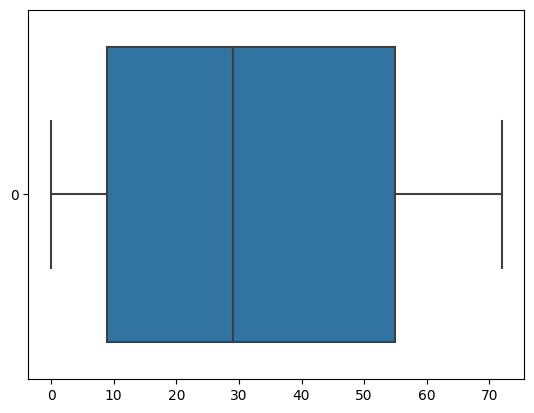

In [80]:
# Membuat Boxplot untuk variabel 'tenure' dari dataframe df dengan orientasi horizontal
sns.boxplot(data=df['tenure'], orient = 'h')

Berdasarkan boxplot tersebut, tidak terdapat nilai yang berada diluar garis whisker. Sehingga dapat disimpulkan bahwa tidak terdapat outlier pada variabel 'tenure'

C:\Users\Steven\AppData\Local\Temp\ipykernel_10424\3026090881.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tenure'])


<Axes: xlabel='tenure', ylabel='Density'>

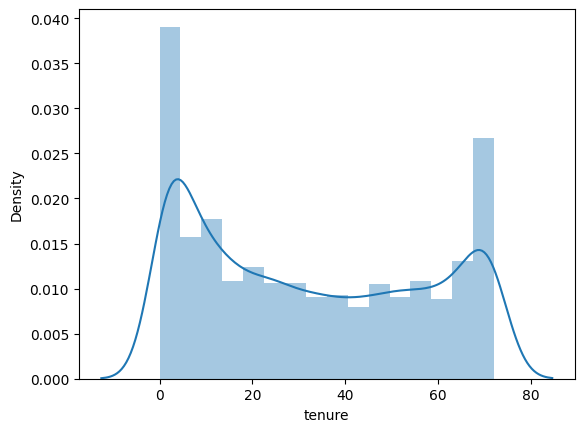

In [92]:
# Membuat histogram untuk melihat pola distribusi dari variabel 'tenure' dari dataframe df
sns.distplot(df['tenure'])

## Variabel 'MonthlyCharges'

In [84]:
# Statistika Deskriptif untuk variabel MonthlyCharges
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

<Axes: >

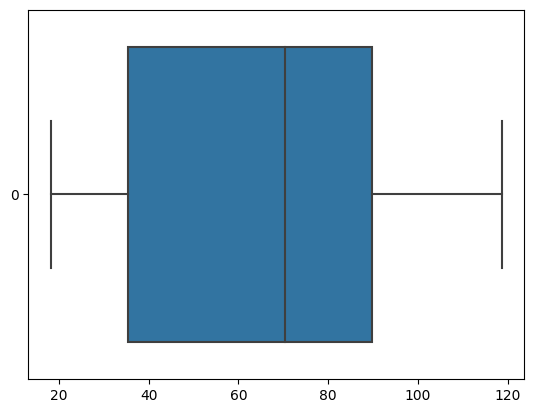

In [85]:
# Membuat Boxplot untuk variabel 'MonthlyCharges' dari dataframe df dengan orientasi horizontal
sns.boxplot(data=df['MonthlyCharges'], orient = 'h')

Berdasarkan boxplot tersebut, tidak terdapat nilai yang berada diluar garis whisker. Sehingga dapat disimpulkan bahwa tidak terdapat outlier pada variabel 'MonthlyCharges'

C:\Users\Steven\AppData\Local\Temp\ipykernel_10424\2565510110.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MonthlyCharges'])


<Axes: xlabel='MonthlyCharges', ylabel='Density'>

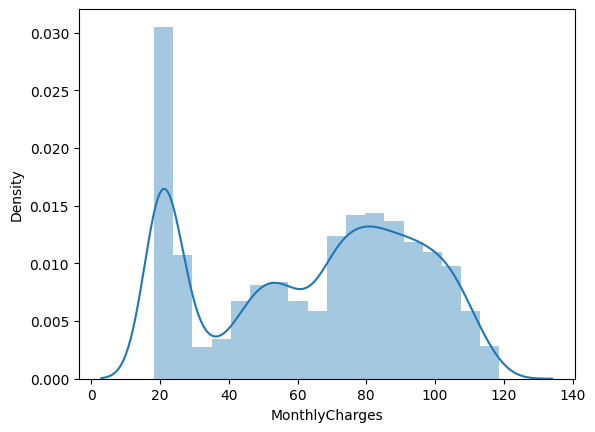

In [91]:
# Membuat histogram untuk melihat pola distribusi dari variabel 'MonthlyCharges' dari dataframe df
sns.distplot(df['MonthlyCharges'])

## Variabel 'TotalCharges'

In [93]:
# Statistika Deskriptif untuk variabel MonthlyCharges
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

<Axes: >

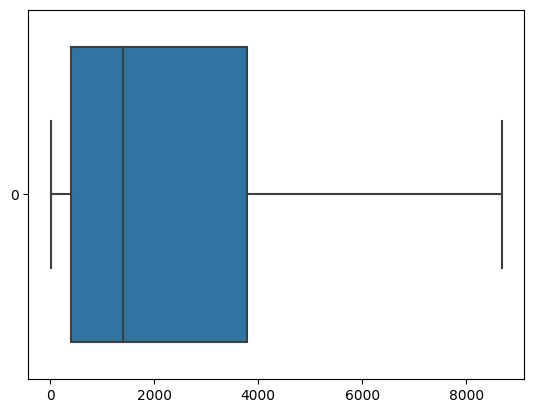

In [94]:
# Membuat Boxplot untuk variabel 'TotalCharges' dari dataframe df dengan orientasi horizontal
sns.boxplot(data=df['TotalCharges'], orient = 'h')

Berdasarkan boxplot tersebut, tidak terdapat nilai yang berada diluar garis whisker. Sehingga dapat disimpulkan bahwa tidak terdapat outlier pada variabel 'TotalCharges'

C:\Users\Steven\AppData\Local\Temp\ipykernel_10424\2119997841.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TotalCharges'])


<Axes: xlabel='TotalCharges', ylabel='Density'>

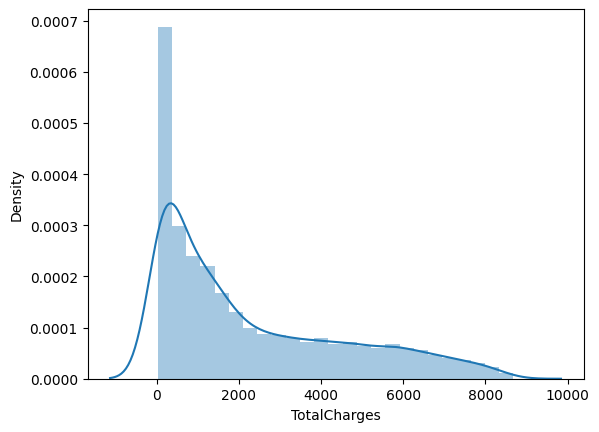

In [95]:
# Membuat histogram untuk melihat pola distribusi dari variabel 'MonthlyCharges' dari dataframe df
sns.distplot(df['TotalCharges'])